Higor Grigorio dos Santos - BI3007511
<br/>
### EE368/CS232 Digital Image Processing

<center>

# Department of Electrical Engineering, Stanford University

</center>

In [110]:

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

PCB = 'pcb.png'
PCB_CROPPED = 'pcbCropped.png'
PCB_CROPPED_TRANSLATED = 'pcbCroppedTranslated.png'
PCB_CROPPED_TRANSLATED_DEFECTED = 'pcbCroppedTranslatedDefected.png'


def open_image(image_name):
    return Image.open('images/' + image_name).convert('L')

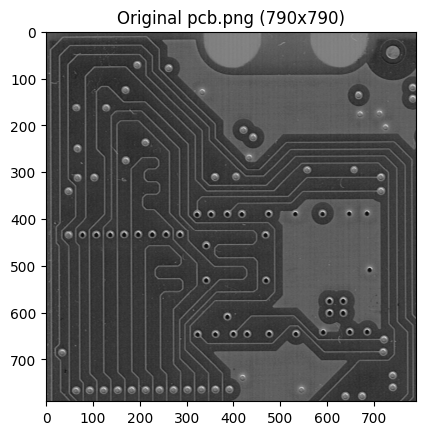

In [111]:
cropped = open_image(PCB_CROPPED)
crp_width, crp_height = cropped.size

plt.imshow(cropped, cmap='gray')
plt.title('Original ' + PCB + (' (%dx%d)' % (crp_width, crp_height)))
plt.show()

cropped = np.array(cropped)

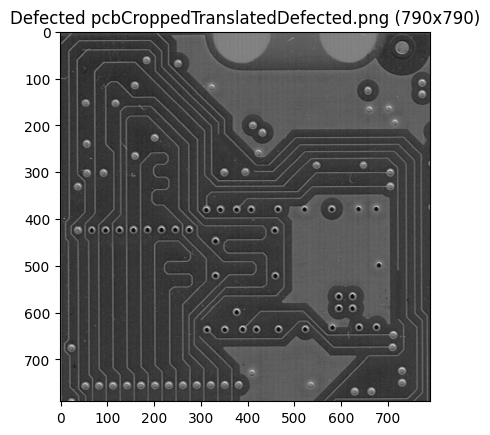

In [112]:
defected = open_image(PCB_CROPPED_TRANSLATED_DEFECTED)
def_width, def_height = defected.size

plt.imshow(defected, cmap='gray')
plt.title('Defected ' + PCB_CROPPED_TRANSLATED_DEFECTED + (' (%dx%d)' % (def_width, def_height)))
plt.show()

defected = np.array(defected)

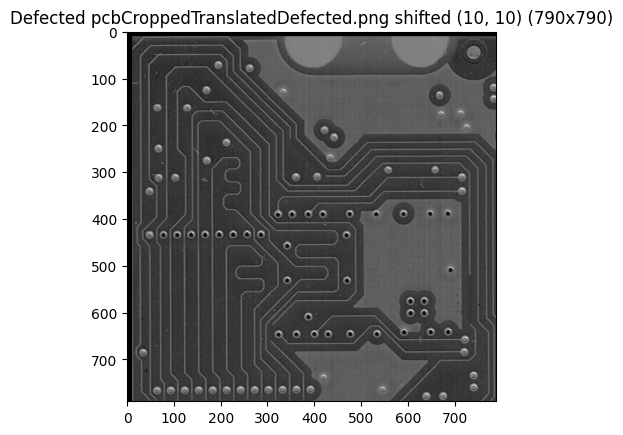

In [113]:

# apply a shift (10, 10) to the defected image
defected_shifted = np.zeros((crp_width, crp_height))

y_shift = 10
x_shift = 10

defected_shifted[y_shift + 1: crp_width, x_shift + 1: crp_height] = defected[1: crp_width - y_shift,
                                                                    1: crp_height - x_shift]

plt.imshow(defected_shifted, cmap='gray')
plt.title('Defected ' + PCB_CROPPED_TRANSLATED_DEFECTED + ' shifted (10, 10)' + (
        ' (%dx%d)' % (def_width, def_height)))
plt.show()

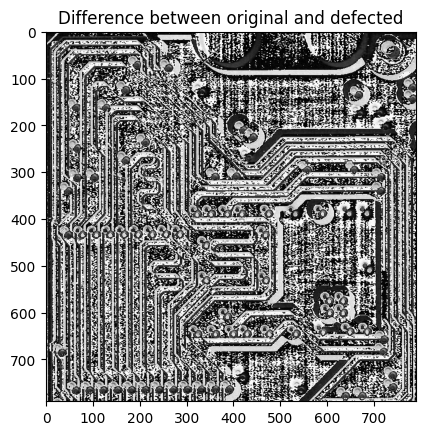

In [114]:
# show difference between original and defected
defected_diff = cropped - defected

plt.imshow(defected_diff, cmap='gray')
plt.title('Difference between original and defected')
plt.show()

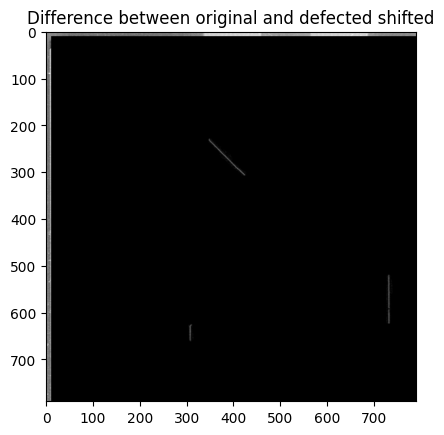

In [115]:
# show difference between original and defected shifted
defected_diff_shifted = cropped - defected_shifted

for x in range(def_width):
    for y in range(def_height):
            defected_diff_shifted[x, y] = abs(cropped[x, y] - defected_shifted[x, y])

plt.imshow(defected_diff_shifted, cmap='gray')
plt.title('Difference between original and defected shifted')
plt.show()

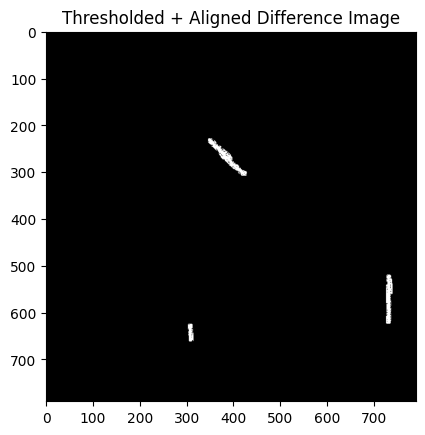

In [117]:
# threshold the difference image
defected_diff_shifted_thresholded = defected_diff_shifted > 0.15
height, width = defected_diff_shifted_thresholded.shape
border = round(height * 0.05)
borderMask = np.zeros((height, width))
borderMask[border:height - border, border:width - border] = 1
defected_diff_shifted_thresholded = defected_diff_shifted_thresholded * borderMask


plt.imshow(defected_diff_shifted_thresholded, cmap='gray')
plt.title('Thresholded + Aligned Difference Image')
plt.show()

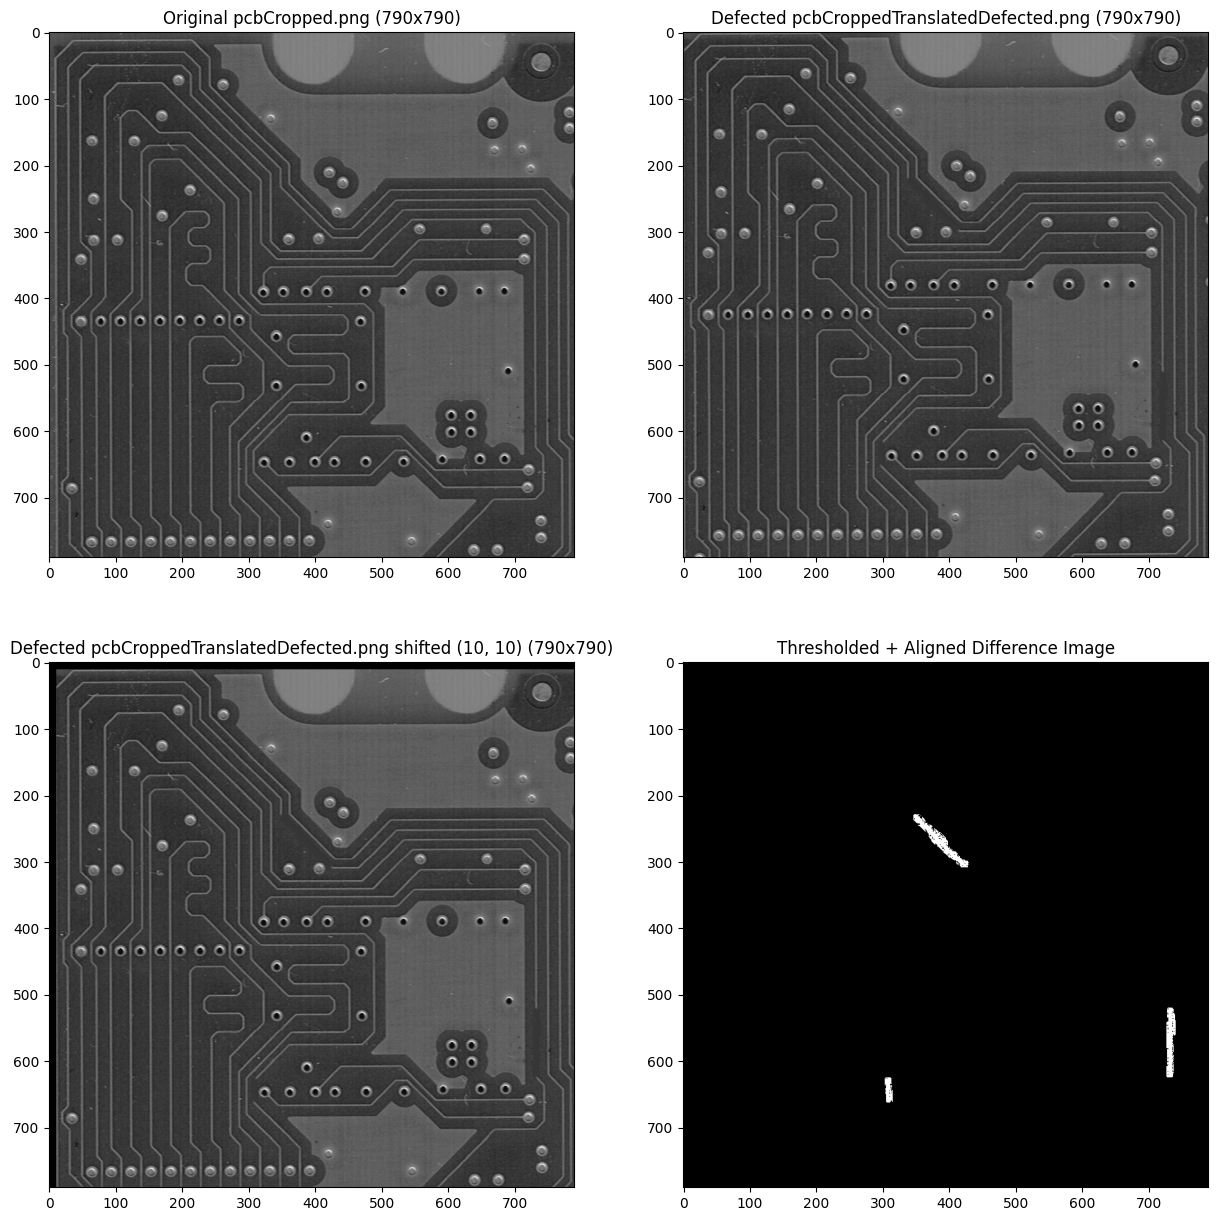

In [128]:
# plot all in same plt for comparison

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(cropped, cmap='gray')

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(defected, cmap='gray')

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(defected_shifted, cmap='gray')

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(defected_diff_shifted_thresholded, cmap='gray')

ax1.title.set_text('Original ' + PCB_CROPPED + (' (%dx%d)' % (crp_width, crp_height)))
ax2.title.set_text('Defected ' + PCB_CROPPED_TRANSLATED_DEFECTED + (' (%dx%d)' % (def_width, def_height)))
ax3.title.set_text('Defected ' + PCB_CROPPED_TRANSLATED_DEFECTED + ' shifted (10, 10)' + (
        ' (%dx%d)' % (def_width, def_height)))
ax4.title.set_text('Thresholded + Aligned Difference Image')

plt.show()